<a href="https://colab.research.google.com/github/NyxJuan/Python/blob/master/Caso01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio N° 01: Crear un reporte asociado a los datos de negocio

Basado en el conjunto de datos "credit data.csv"

Crear un reporte con la siguiente descripción:

- Periodo de analisis: de 2014 a 2015
- Unidad de Tiempo: Trimestral (y total anual)
- Grupos de analisis: Por ingreso mensual con grupos. 
    * menos de 2.500
    * 2.500 a 5.000
    * 5.000 a 10.000
    * mas de 10.000
- KPIs:
    - Número de Créditos
    - delincuencia promedio (porcentaje de clientes en morosidad de 90dpd)
    - ingreso mensual promedio
- Estructura de tabla:
    * cuartos en columnas
    * Grupos y KPIs en filas.
- Dibuja una gráfica con:
    - Barras apiladas para el número de créditos
    - Líneas para la morosidad media

Adicional, Analisis de Data Exploratorio:

- Crear un par gráfico de parejas para todas las variables
- Crear un gráfico con Ingresos VS Edad en el medio, más distribuciones marginales    

### 1. Import the data

While importing, be sure to take care of:  
    - variable format
    - missing values:
        * missing in MonthlyIncome must be filled with the median
        * missing in NumberOfDependents must be filled with 0
    - dates
    

In [0]:
# import libraries

import pandas as pd
import numpy as np
import datetime as dt

In [16]:
# import the data

base = pd.read_csv('./credit data.csv')

# check types

base.shape


(150000, 1)

In [17]:
# check the dates are well loaded

base.head()


,Id;SeriousDlqin2yrs;RevolvingUtilizationOfUnsecuredLines;age;NumberOfTime30-59DaysPastDueNotWorse;DebtRatio;MonthlyIncome;NumberOfOpenCreditLinesAndLoans;NumberOfTimes90DaysLate;NumberRealEstateLoansOrLines;NumberOfTime60-89DaysPastDueNotWorse;NumberOfDependents;cohort_date
0,1;1;0.766126609;45;2;0.802982129;9120;13;0;6;0...
1,2;0;0.957151019;40;0;0.121876201;2600;4;0;0;0;...
2,3;0;0.65818014;38;1;0.085113375;3042;2;1;0;0;0...
3,4;0;0.233809776;30;0;0.036049682;3300;5;0;0;0;...
4,5;0;0.9072394;49;1;0.024925695;63588;7;0;1;0;0...


### 2. Missing values inputation

In [19]:
previsores = base.iloc[:, 1:4].values
previsores

array([], shape=(150000, 0), dtype=object)

In [0]:
# missing imputation

print(data.isnull().sum())
    

# check missings

print(data_test.isnull().sum())



Id                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
cohort_date                             0
dtype: int64

### 3. Select the data sample for the report

In [0]:
# filter by date

df = NYC
print(df.RPT_DT.head(3))
#create the year column
df["year"] = [date[-4:] for date in df.RPT_DT]
#filter the year by only selecting 2014 and 2015
df = df[(df["year"] == "2014") | (df["year"] == "2015")]



Timestamp('2015-12-31 00:00:00')

### 4. Create intermediate variables

Hints: 
- use *.dt.year and *.dt.quarter for date columns and astype() to convert columns
- use pd.cut() method for binning a variable

In [0]:
# create quarter variable

hours = [i for i in range(24)]

df_hours = pd.to_datetime(df.CMPLNT_FR_TM).dt.hour
df_hours = pd.DataFrame({'hour':df_hours})


sns.countplot(y='hour', data=df_hours, palette = "CMRmap", order=hours)
plt.title(' ¿A qué hora del día ocurren los crímenes? (2014-2015)')



# create income_groups variable




/Applications/analytics/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/analytics/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# check

data.describe()


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date,Quarter,Income Group
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2015-09-17,2015-3,Group 3
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,2015-11-18,2015-4,Group 4
6,7,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0,2015-12-12,2015-4,Group 3
8,9,0,0.116951,27,0,46.000000,5400.0,2,0,0,0,0.0,2014-06-22,2014-2,Group 3
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,2014-03-07,2014-1,Group 4


### 5. Create report

In [0]:
# make dataframe groupby object


import matplotlib.pytlot as plt
import pandas as pd
x=df['Income']
y=df['Delinquency']
plt.scatter(x,y)
plt.show()


In [0]:
# report for delinquency


data['Delinquency'].fillna(data['Delinquency'].mean(),inplace=True)


,Income Group,Quarter,Num loans,Delinquency
0,Group 1,2014-1,1560,0.082692
1,Group 1,2014-2,1545,0.104207
2,Group 1,2014-3,1486,0.094886
3,Group 1,2014-4,1569,0.101976
4,Group 1,2015-1,1524,0.087270


In [0]:
# report for MonthlyIncome


data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean(),inplace=True)


,Income Group,Quarter,Income
0,Group 1,2014-1,1683.596795
1,Group 1,2014-2,1709.381877
2,Group 1,2014-3,1678.436743
3,Group 1,2014-4,1666.393244
4,Group 1,2015-1,1675.868110


In [0]:
# merge both reports


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X,y.values.ravel())
y_pred = model.predict(X)
print("The Accuracy score is : ",accuracy_score(y,y_pred)*100,"%")
print(confusion_matrix(y,y_pred))


,Income Group,Quarter,Num loans,Delinquency,Income
0,Group 1,2014-1,1560,0.082692,1683.596795
1,Group 1,2014-2,1545,0.104207,1709.381877
2,Group 1,2014-3,1486,0.094886,1678.436743
3,Group 1,2014-4,1569,0.101976,1666.393244
4,Group 1,2015-1,1524,0.087270,1675.868110


In [0]:
# pivot table

dfmi.loc[:, ('one', 'second')] = value
# becomes
dfmi.loc.__setitem__((slice(None), ('one', 'second')), value)

# arrange for final report

dfmi['one']['second'] = value
# becomes
dfmi.__getitem__('one').__setitem__('second', value)


# export to csv




Quarter                         2014-1        2014-2        2014-3  \
Income Group                                                         
Group 1      Delinquency      0.082692      0.104207      0.094886   
             Income        1683.596795   1709.381877   1678.436743   
             Num loans     1560.000000   1545.000000   1486.000000   
Group 2      Delinquency      0.088301      0.084932      0.088118   
             Income        3838.567492   3832.727945   3832.210631   
             Num loans     3556.000000   3650.000000   3518.000000   
Group 3      Delinquency      0.054484      0.056326      0.058782   
             Income        6470.650570   6499.673648   6450.835689   
             Num loans     7103.000000   7066.000000   7145.000000   
Group 4      Delinquency      0.041543      0.046110      0.040517   
             Income       18130.696142  16482.202305  15837.686436   
             Num loans     1685.000000   1735.000000   1703.000000   

Quarter                         2014-4        2015-1        2015-2  \
Income Group                                                         
Group 1      Delinquency      0.101976      0.087270      0.102923   
             Income        1666.393244   1675.868110   1655.060292   
             Num loans     1569.000000   1524.000000   1642.000000   
Group 2      Delinquency      0.079920      0.085162      0.093519   
             Income        3845.432254   3834.719977   3830.233655   
             Num loans     3491.000000   3464.000000   3518.000000   
Group 3      Delinquency      0.056920      0.057347      0.059867   
             Income        6464.588867   6494.781455   6480.926798   
             Num loans     7168.000000   7010.000000   7049.000000   
Group 4      Delinquency      0.041593      0.042388      0.039414   
             Income       16990.752197  16240.778507  15663.829955   
             Num loans     1707.000000   1675.000000   1776.000000   

Quarter                         2015-3        2015-4  
Income Group                                          
Group 1      Delinquency      0.083499      0.096178  
             Income        1686.732273   1680.112824  
             Num loans     1509.000000   1622.000000  
Group 2      Delinquency      0.084371      0.090403  
             Income        3803.901521   3844.262031  
             Num loans     3615.000000   3595.000000  
Group 3      Delinquency      0.060669      0.062171  
             Income        6454.233236   6485.409859  
             Num loans     7203.000000   7222.000000  
Group 4      Delinquency      0.055911      0.039071  
             Income       15568.647641  16868.279728  
             Num loans     1717.000000   1766.000000

### 6. Graph

In [0]:
# bar plot


plt.figure(figsize=(10,6))
plt.xlabel("CREDIT DATA")
plt.hist(x=loan[loan['DebtRatio']==0]['fico'],label='credit policy=0',color='red',edgecolor='black',bins=30)
plt.hist(x=loan[loan['DebtRatio']==1]['fico'],label='credit policy=1',alpha=0.7,edgecolor='black',bins=30)
plt.legend()


# line plot




### 7. Exploratory Data Analysis

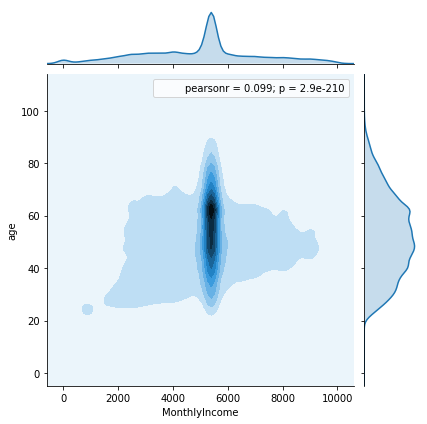

In [0]:
# Scatter plot with margins

g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)